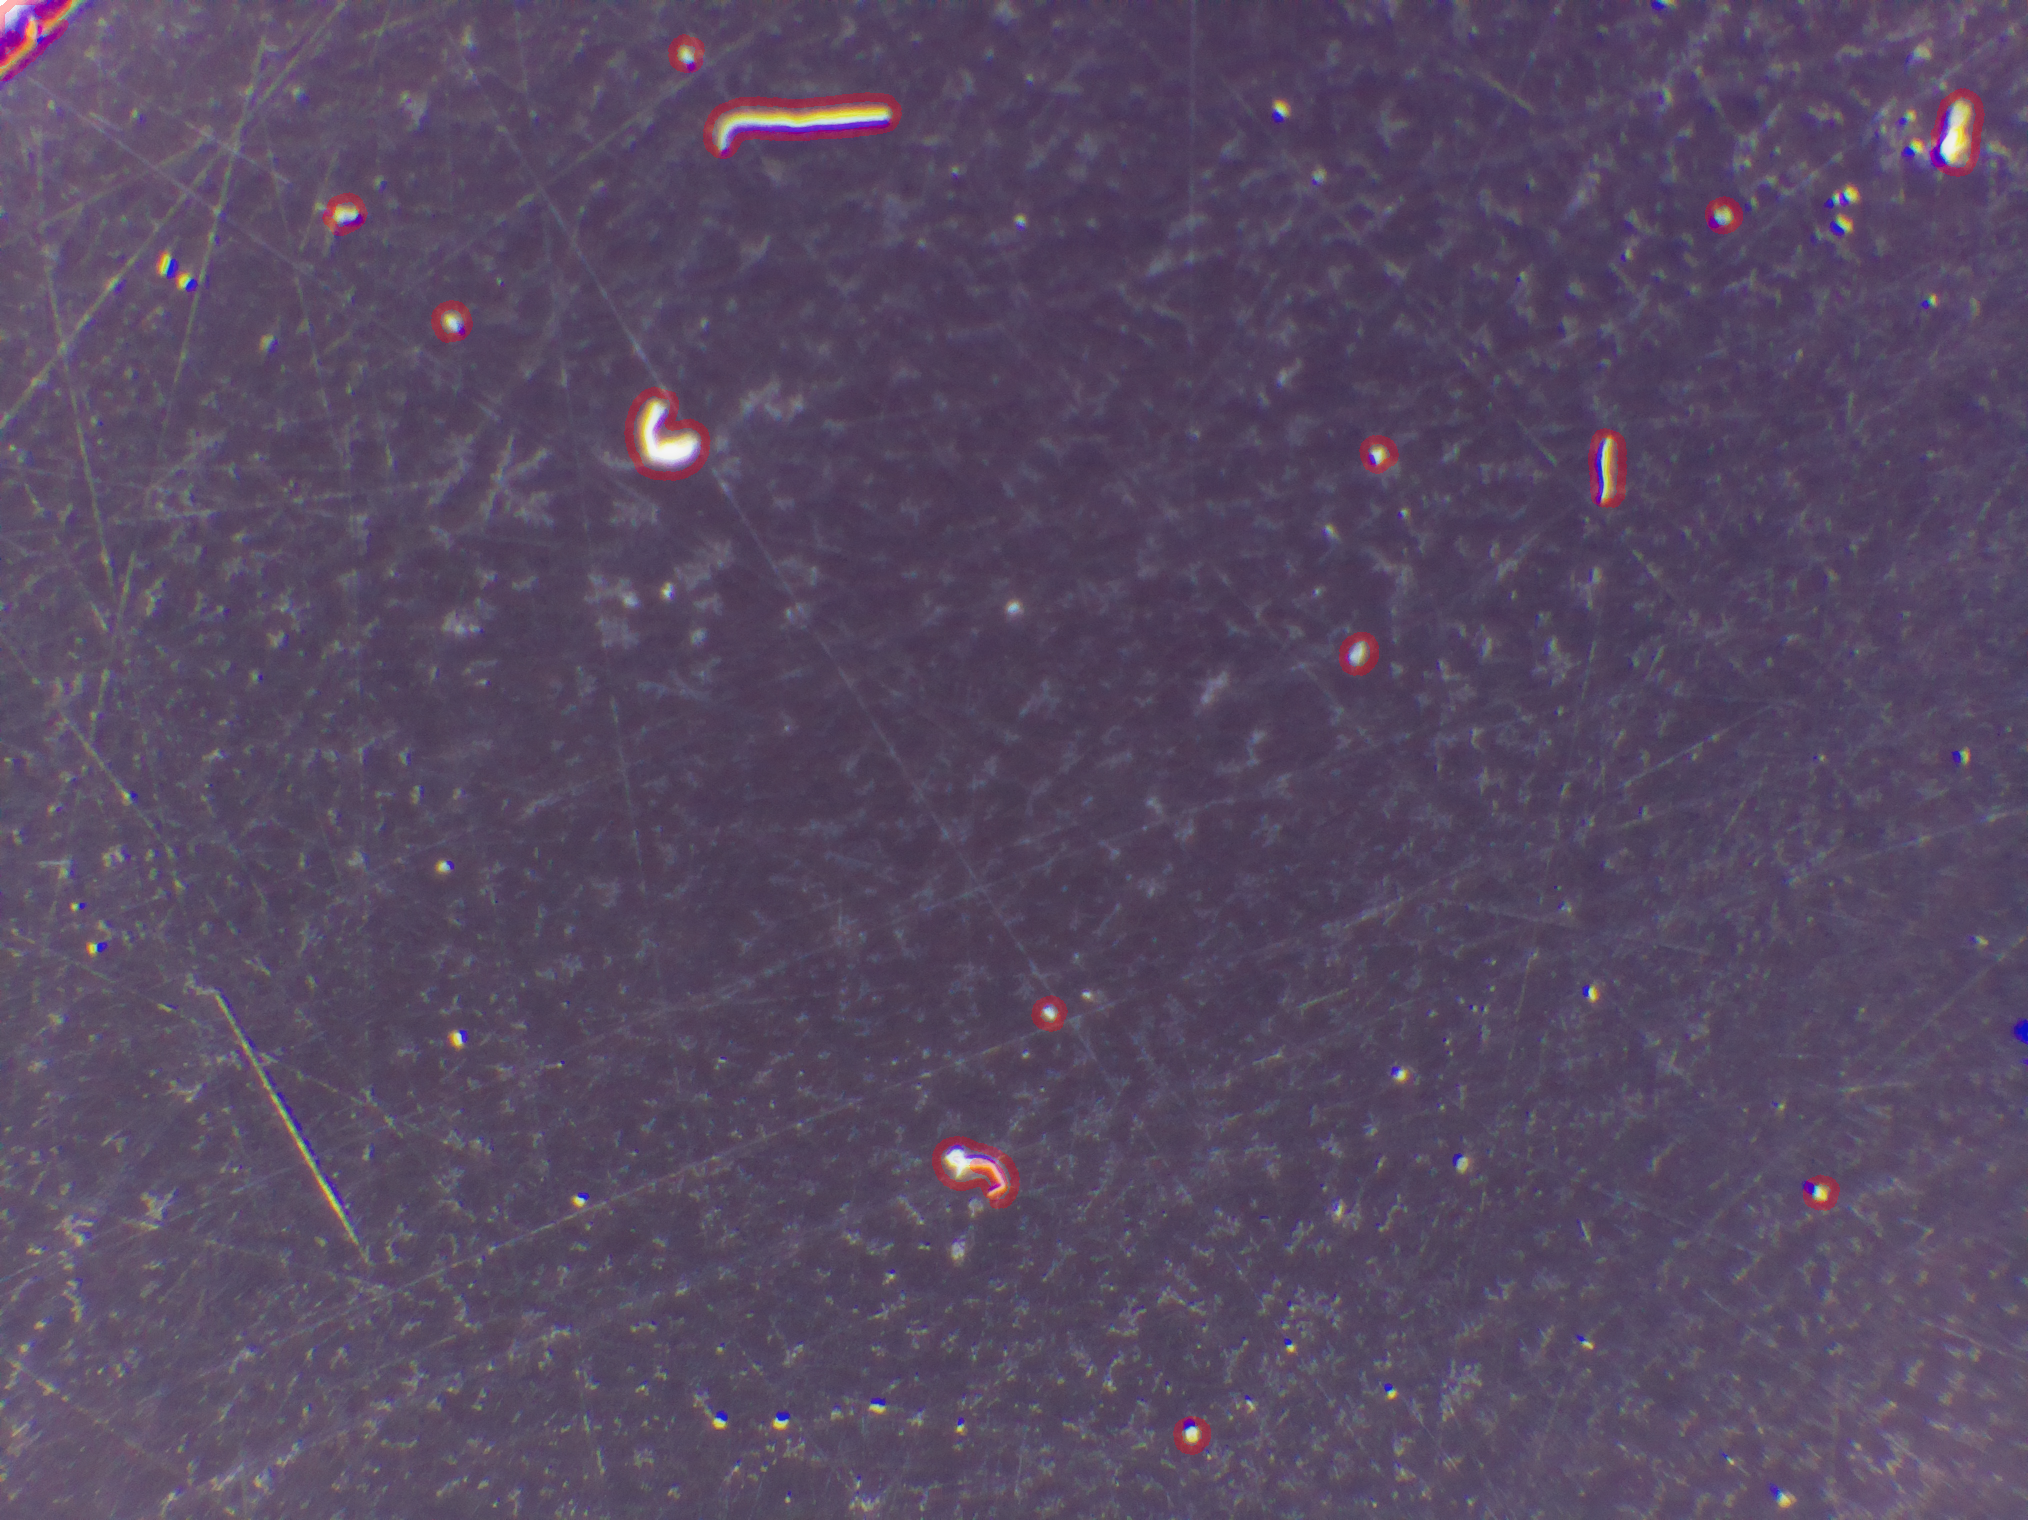

In [22]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter, binary_fill_holes
from skimage.morphology import disk, binary_closing, remove_small_objects
from skimage.filters import sobel
from google.colab.patches import cv2_imshow

# Read and resize the image
im = cv2.imread('tile_10.jpg')
im1 = cv2.resize(im, (0, 0), fx=0.5, fy=0.5)

# Convert to grayscale
gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

# Gaussian filter
gSize = 15
gray = gaussian_filter(gray, sigma=gSize/2)

# Gradient magnitude (using Sobel filter)
mg = sobel(gray)

# Thresholding
mgBw = mg > 0.3 * np.max(mg)

# Morphological closing with a disk-shaped structuring element
mgBw = binary_closing(mgBw, disk(1))

# Remove small objects (area opening)
mgBw = remove_small_objects(mgBw, 500)

# Further morphological closing
mgBw = binary_closing(mgBw, disk(2))

# Fill holes
mgBw = binary_fill_holes(mgBw)

# Convert binary mask to 8-bit format
mgBw = (mgBw * 255).astype(np.uint8)

# Find contours
contours, _ = cv2.findContours(mgBw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a color version of the grayscale image for overlay
overlay = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

# Draw contours (outlined in green)
cv2.drawContours(overlay, contours, -1, (0, 0, 255), 8)

# Blend the overlay with the original image
blended = cv2.addWeighted(im1, 0.7, overlay, 0.3, 0)

# Display the result
cv2_imshow(blended)

